In [21]:
from sklearn import datasets # 使用sklearn自带数据
from sklearn.model_selection import train_test_split #把数据分成训练和测试数据
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [22]:
iris = datasets.load_iris() # UCI dataset, 三分类问题
X = iris.data # 特征，矩阵：N*D N: #(number) OF SAMPLES D: # of dimension
y = iris.target # label: 标签（0, 1, 2), 向量, 类型
print (X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [23]:
# random_state 随机种子，指定一个值可以确保实验结果一致
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003) # 默认25%作为测试数据

In [24]:
# 构建KNN模型， K值为3，并做训练
clf = KNeighborsClassifier(n_neighbors=3) # K
clf.fit(X_train, y_train) # 训练 对于KNN来说，实际什么都没干，只是把数据读入内存，在预测时再计算即可

KNeighborsClassifier(n_neighbors=3)

In [25]:
# 计算准确率
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test)) # sklearn
# correct = np.count_nonzero((clf.predict(X_test)==y_test) == True) # 自己实现accuracy_score
# print ("Accuracy is: %.3f" %(correct/len(X_test)))

0.9210526315789473

# 从零实现一个KNN

In [26]:
from sklearn import datasets
from collections import Counter # 投票, 计数
from sklearn.model_selection import train_test_split
import numpy as np

In [27]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
x_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [28]:
def euc_dis(instance1, instance2):
    '''
    计算两个样本之间的欧式距离
    instance1: 第一个样本, array型
    instance2: 第二个样本, array型
    '''
    return np.sqrt(sum((instance1 - instance2)**2))

In [29]:
def knn_classify(X, y, testInstance, k):
    '''
    给定一个测试数据testInstance， 通过KNN算法来预测它的标签。
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance：测试数据
    k: 选择多少个neighbors
    '''
    disntances = [euc_dis(x, testInstance) for x in X]
    kneighbors = np.argsort(disntances)[:k] # 返回下标
    count = Counter(y[kneighbors])
    return count.most_common()[0][0]

In [30]:
# 预测结果
predictions = [knn_classify(X_train, y_train, data, 3) for data in X_test]
correct = np.count_nonzero((predictions==y_test)==True)
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


# KNN决策边界

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

# 生成一些随机样本
n_points = 100
X1 = np.random.multivariate_normal([1,50], [[1,0],[0,10]], n_points)
X2 = np.random.multivariate_normal([2,50], [[1,0],[0,10]], n_points)
X = np.concatenate([X1,X2])
y = np.array([0]*n_points + [1]*n_points)
print (X.shape, y.shape)

(200, 2) (200,)


In [32]:
# KNN模型的训练过程
clfs = []
neighbors = [1,3,5,9,11,13,15,17,19]
for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))

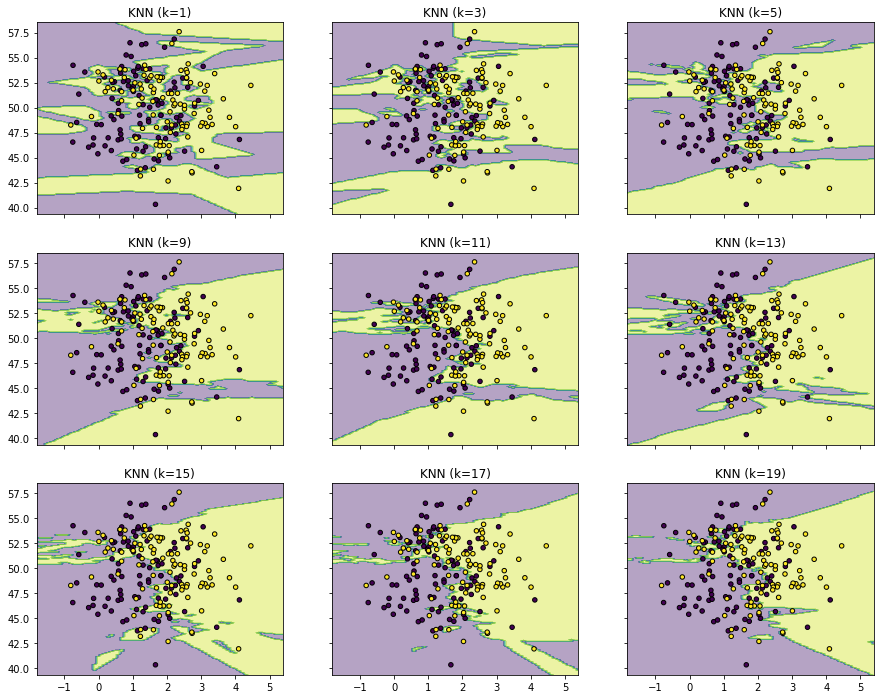

In [33]:
# 可视化结果
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3,3, sharex='col', sharey='row', figsize=(15, 12))
for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]),
                        clfs,
                        ['KNN (k=%d)'%k for k in neighbors]):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()